In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_circles

In [7]:
X, y = make_circles(n_samples=200,noise=0.25, random_state=2)

In [9]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

In [10]:
df['Target'] = y

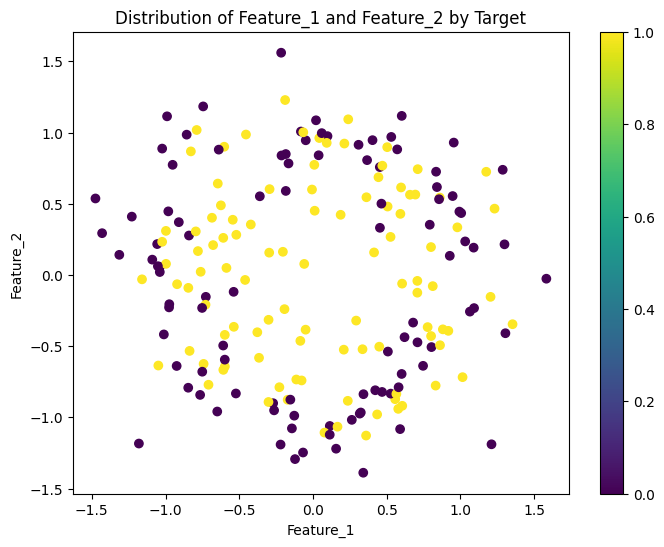

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['Feature_1'], df['Feature_2'], c=df['Target'], cmap='viridis')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.title('Distribution of Feature_1 and Feature_2 by Target')
_ = plt.colorbar()

In [12]:
from tensorflow.keras.layers import Dense, Input, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [13]:
X = df.iloc[:, 0:2].values
y = df.iloc[:,-1].values

In [14]:
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(2, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [16]:
history = model.fit(X, y, epochs=200, validation_split=0.2)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.5932 - loss: 0.6973 - val_accuracy: 0.3750 - val_loss: 0.7606
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5898 - loss: 0.6898 - val_accuracy: 0.3750 - val_loss: 0.7607
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5837 - loss: 0.6929 - val_accuracy: 0.3750 - val_loss: 0.7603
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5971 - loss: 0.6900 - val_accuracy: 0.3750 - val_loss: 0.7599
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5720 - loss: 0.6923 - val_accuracy: 0.3750 - val_loss: 0.7595
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5650 - loss: 0.6876 - val_accuracy: 0.3750 - val_loss: 0.7594
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5694 - loss: 0.6965 - val_accuracy: 0.3750 - val_loss: 0.7588
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5672 - loss: 0.6964 - val_accuracy: 0.3750 - val_loss: 

In [17]:
model1 = Sequential()
model1.add(Input(shape=(2,)))
model1.add(Dense(3, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(2, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 3)                   │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [18]:
model1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [19]:
history1 = model1.fit(X, y, epochs=200, validation_split=0.2)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.5796 - loss: 0.6812 - val_accuracy: 0.4000 - val_loss: 0.6950
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5470 - loss: 0.6864 - val_accuracy: 0.4000 - val_loss: 0.6950
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5701 - loss: 0.6976 - val_accuracy: 0.4000 - val_loss: 0.6951
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5738 - loss: 0.6825 - val_accuracy: 0.4000 - val_loss: 0.6951
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5585 - loss: 0.6926 - val_accuracy: 0.4000 - val_loss: 0.6951
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6408 - loss: 0.6568 - val_accuracy: 0.4000 - val_loss: 0.6953
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5510 - loss: 0.7018 - val_accuracy: 0.3500 - val_loss: 0.6953
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6112 - loss: 0.6817 - val_accuracy: 0.4250 - val_loss:

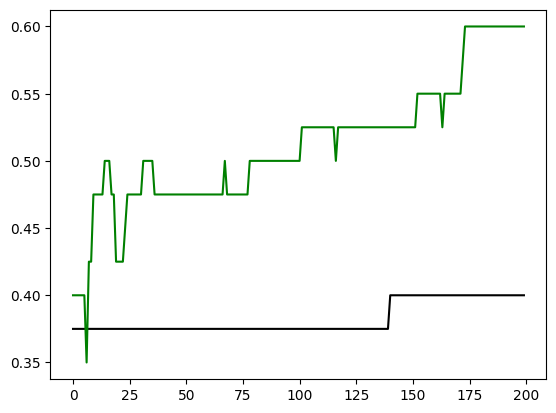

In [20]:
plt.plot(history.history['val_accuracy'], color='black')
plt.plot(history1.history['val_accuracy'], color='green')
